In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy import optimize

import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/mnist', kind='t10k')

n = 2000
#np.random.seed(6333)
#ids = np.random.choice(range(60000),n)
#X_train, y_train = X_train[ids], y_train[ids]

n = X_train.shape[0]


X_train = X_train.astype(np.float32)
max_val = np.max(X_train)
X_train = X_train/max_val

X_test = X_test.astype(np.float32) / max_val

X_all = np.concatenate((X_train,X_test))

classes = [
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9']

print(y_train)
print('Max Value Before Normalization: ', max_val)
print(X_train.shape, y_train.shape)

from scipy.io import savemat

d = {}
d['X_train'] = X_train
d['y_train'] = y_train
d['X_test'] = X_test
d['y_test'] = y_test

savemat('Parametric_tSNE/mnist/data.mat',d)
    
%matplotlib notebook

%load_ext autoreload
%autoreload 2

[5 0 4 ... 5 6 8]
Max Value Before Normalization:  255.0
(60000, 784) (60000,)


None


/home/ponir/.local/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


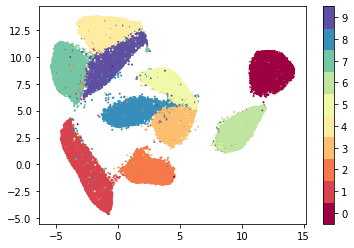

In [2]:
import umap

min_dist = 0.25

np.random.seed(100)
ump = umap.UMAP(n_neighbors=30,
        min_dist=0.25,
        n_components=2,
        random_state=100,
        metric= 'euclidean')

print(ump.n_epochs)

y_umap = ump.fit_transform(X_train)
y_umap_test = ump.transform(X_test)

plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=1.0, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

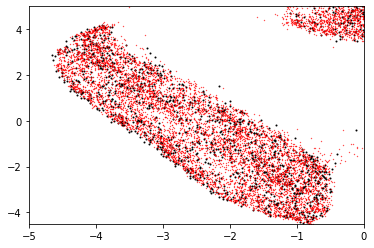

In [3]:
y_all = np.concatenate((np.zeros(X_train.shape[0]), np.ones(X_test.shape[0])))
#plt.figure(figsize=(15,15))

plt.figure()
c1 = 'k'
c2 = 'r'
plt.scatter(y_umap_test[:,0], y_umap_test[:,1], c=c1, s=1)
plt.scatter(y_umap[:,0], y_umap[:,1], c=c2, s=0.1)

plt.xlim([-5,0])
plt.ylim([-4.5,5])


classes_tr = ['train', 'test']

#plt.savefig('Shortness/yale_short_umap_repulsioneffect.png', bbox_inches='tight', dpi=DPI)

In [4]:
def get_indexes(ys, xr, yr):
    
    N1 = len(ys)
    
    idxs = []
    
    for i in range(N1):
        idx_in = True
        if ys[i][0] < xr[0] or ys[i][0] > xr[1]:
            idx_in = False
        if ys[i][1] < yr[0] or ys[i][1] > yr[1]:
            idx_in = False
        
        if idx_in:
            idxs.append(i)
            
    return idxs

idxs_outside = get_indexes(y_umap_test, xr=[-4.45, -4.20], yr=[1.05, 1.42])

print(idxs_outside, len(idxs_outside))

idxs_inside = get_indexes(y_umap_test, xr=[-4.10, -3.70], yr=[1.05, 1.42])

print(idxs_inside, len(idxs_inside))


idxs_outside2 = get_indexes(y_umap_test, xr=[-3.80, -3.60], yr=[-0.3, 0.1])

print(idxs_outside2, len(idxs_outside2))

idxs_inside2 = get_indexes(y_umap_test, xr=[-3.40, -3.30], yr=[-0.3, 0.1])

print(idxs_inside2, len(idxs_inside2))


idxs_outside3 = get_indexes(y_umap_test, xr=[-2.65, -2.45], yr=[-2.7, -2.4])

print(idxs_outside3, len(idxs_outside3))

idxs_inside3 = get_indexes(y_umap_test, xr=[-2.35, -2.00], yr=[-2.7, -2.35])

print(idxs_inside3, len(idxs_inside3))

[5254, 5281, 5442, 5746, 7048, 7167, 7171, 7395, 8128, 8768, 8862, 8875] 12
[107, 1305, 4589, 5113, 6712, 6720, 7822, 7944, 9622, 9641, 9760, 9946] 12
[836, 2928, 3638, 4409, 5013, 5227, 6601, 7527, 7591, 8420] 10
[1729, 2885, 3452, 4917, 5208, 6320, 6618, 7005, 8099, 8724] 10
[40, 809, 1037, 1040, 1189, 1329, 2786] 7
[74, 196, 1011, 2878, 2943, 3546, 9096] 7


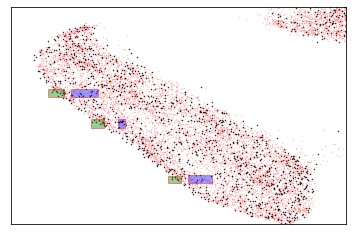

In [5]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

DPI = 400

ar = 6.4/4.8

#plt.figure()
fig, ax = plt.subplots()

def plot_this(ax, alpha_value=0.4):
    c1 = 'k'
    c2 = 'r'
    plt.scatter(y_umap_test[:,0], y_umap_test[:,1], c=c1, s=0.2)
    plt.scatter(y_umap[:,0], y_umap[:,1], c=c2, s=0.1, alpha=0.3)

    box1_0 = Rectangle([-4.45, 1.05], abs(-4.45- -4.20), abs(1.05-1.42), linewidth=1, edgecolor='r', facecolor='g', alpha=alpha_value)
    ax.add_patch(box1_0)

    box1_i = Rectangle([-4.10, 1.05], abs(-4.10--3.70), abs(1.05-1.42), linewidth=1, edgecolor='r', facecolor='b', alpha=alpha_value)
    ax.add_patch(box1_i)

    box2_0 = Rectangle([-3.80, -0.3], abs(-3.80- -3.60), abs(-0.3-0.1), linewidth=1, edgecolor='r', facecolor='g', alpha=alpha_value)
    ax.add_patch(box2_0)

    box2_i = Rectangle([-3.40, -0.3],abs(-3.40- -3.30), abs(-0.3- 0.1), linewidth=1, edgecolor='r', facecolor='b', alpha=alpha_value)
    ax.add_patch(box2_i)


    box3_0 = Rectangle([-2.65, -2.7], abs(-2.65- -2.45), abs(-2.7- -2.4), linewidth=1, edgecolor='r', facecolor='g', alpha=alpha_value)
    ax.add_patch(box3_0)


    box3_i = Rectangle([-2.35, -2.7], abs(-2.35- -2.00), abs(-2.7- -2.35), linewidth=1, edgecolor='r', facecolor='b', alpha=alpha_value)
    ax.add_patch(box3_i)
    
    plt.xlim([-5,0])
    plt.ylim([-4.5,5])
    
plot_this(ax)
#plt.xlim([-5,15])
#plt.ylim([-2,8])

#plt.text(6.1, 5.55, '$S_1$')
#plt.text(6.48, -1, '$S_2$')
#plt.text(-1.78, 4.25, '$S_3$')

plt.xticks([])
plt.yticks([])

inset_1 = Rectangle([6.47, -1.59], abs(6.47-8.65), abs(-1.59--0.6), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(inset_1)
''' 
multiplier = 0.18
sub_axes = plt.axes([.7, .7, abs(3.8-3.2)*multiplier/ar, abs(5.4-4.45)*multiplier]) 
plot_this(sub_axes)
plt.xticks([])
plt.yticks([])
sub_axes.spines['bottom'].set_color('red')
sub_axes.spines['top'].set_color('red')
sub_axes.spines['left'].set_color('red')
sub_axes.spines['right'].set_color('red')
#sub_axes.tick_params(axis='x', colors='red')
#sub_axes.tick_params(axis='y', colors='red')
plt.xlim([6.47,8.65])
plt.ylim([-1.59,-0.6])

''' 



inset_2 = Rectangle([9.4, 0.0], abs(9.4-10.1), abs(0.0-0.9), linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(inset_2)

''' 
multiplier = 0.3
sub_axes2 = plt.axes([.2, .6, abs(-3.1+2.6)*multiplier/ar, abs(2.5-2.9)*multiplier]) 
plot_this(sub_axes2)
sub_axes2.spines['bottom'].set_color('y')
sub_axes2.spines['top'].set_color('y')
sub_axes2.spines['left'].set_color('y')
sub_axes2.spines['right'].set_color('y')
plt.xticks([])
plt.yticks([])
plt.xlim([-3.1,-2.6])
plt.ylim([2.5,2.9])
''' 

inset_3 = Rectangle([1.25, -1.1], abs(1.25-1.85), abs(-1.1-0.3), linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(inset_3)

''' 
multiplier = 0.1
sub_axes3 = plt.axes([.73, 0.2, abs(3.6-4.6)*multiplier/ar, abs(1.2)*multiplier]) 
plot_this(sub_axes3)
sub_axes3.spines['bottom'].set_color('g')
sub_axes3.spines['top'].set_color('g')
sub_axes3.spines['left'].set_color('g')
sub_axes3.spines['right'].set_color('g')
plt.xticks([])
plt.yticks([])
plt.xlim([3.6,4.6])
plt.ylim([0, 1.2])

'''


## plot the zoomed portion
#sub_axes.scatter(y_umap_test[:,0], y_umap_test[:,1], c=c1, s=0.1)

plt.savefig('mnist_rfr_afr_places.png', bbox_inches='tight', dpi=DPI)
z = 0

In [6]:
def get_weight_function(dists, rho, sigma):
    d = dists - rho
    #print(d)
    d[d<0] = 0
    weight = np.exp(- d / sigma )
    #print(max(d))
    return weight


def search_sigma(dists, rho, k, tol = 10**-5, n_iteration=200):
    sigma_min = 0
    sigma_max = 1000
    
    cur_sigma = 100
    
    logk = np.log2(k)
    #print(logk)
    
    for i in range(n_iteration):
        
        cur_sigma = (sigma_min+sigma_max)/2
        probs = get_weight_function(dists,rho,cur_sigma)
        weight = np.sum(probs)
        #print(weight)
        
        if np.abs(logk - weight) < tol:
            break
        
        if weight < logk:
            sigma_min = cur_sigma
        else:
            sigma_max = cur_sigma
        
    return cur_sigma, probs


def get_ab(MIN_DIST):

    x = np.linspace(0, 3, 300)
    y = np.exp(- (x-MIN_DIST) * ( (x - MIN_DIST) >=0 ) )

    dist_low_dim = lambda x, a, b: 1 / (1 + a*x**(2*b))

    p , _ = optimize.curve_fit(dist_low_dim, x, y)

    a = p[0]
    b = p[1] 
    #print("Hyperparameters a = " + str(a) + " and b = " + str(b))

    return a, b


def nearest_neighbors_search(x, x_train, y, y_train, n_neighbors, min_dist):
    
    dist = np.sqrt(np.sum((x_train-x)**2,axis=1))
    sort_idx = np.argsort(dist)
    rho = dist[sort_idx[0]]
    x_dists = dist[sort_idx[:n_neighbors]]
    
    y_diff = y_train[sort_idx[:n_neighbors]]-y
    y_dists = np.sqrt(np.sum(( y_diff )**2,axis=1))
    
    
    #print(dist[:15])
    #print(np.sort(dist)[:15])
    #print(dist[sort_idx[:15]])
    
    sigma, weight = search_sigma(dists = x_dists,rho = rho,k = n_neighbors)
    
    a,b = get_ab(min_dist)
    
    
    ps = weight
    qs = 1 / ( 1 + a * (y_dists) ** b )
    
    #print(ps)
    #print(qs)
    
    pos_loss = np.log(ps/qs+10**-10)
    neg_loss = np.log((1-ps)/(1-qs)+10**-10)
    
    ratio = np.sum(pos_loss/neg_loss)
    
    
    attraction_forces = 2*a*b*y_dists**(b-1.0) / (1 + a * y_dists**b)
    aforces = 0
    af_sum = 0
    
    repulsion_forces = 2 * b / ( y_dists * (1.0 + a * y_dists**b) )
    rforces = 0
    rf_sum = 0
    
    for i in range(len(repulsion_forces)):
        rforces += repulsion_forces[i] * y_diff[i] * (1-ps[i])
        rf_sum += np.sum((repulsion_forces[i] * y_diff[i])**2)
        
        #print(repulsion_forces[i] * y_diff[i], rforces, np.sum((repulsion_forces[i] * y_diff[i])**2), rf_sum)
        #print(forces)
        aforces += attraction_forces[i] * y_diff[i] * ps[i]
        af_sum += np.sum((attraction_forces[i] * y_diff[i])**2)
        
    repulsion_force = np.sqrt(np.sum(rforces**2)) #/len(repulsion_forces)
    attraction_force = np.sqrt(np.sum(aforces**2)) #/len(attraction_forces)
    
    
    #print(ratio,repulsion_force, attraction_force)
    #print(rforces, rf_sum)
    
    return ratio, repulsion_force, attraction_force

ratio, repulsion_force, attraction_force = nearest_neighbors_search(X_test[0,:], X_train, 
                                    y_umap_test[0,:], y_umap, 
                                    n_neighbors=30, min_dist=min_dist)

<h1>n_s=3</h1>

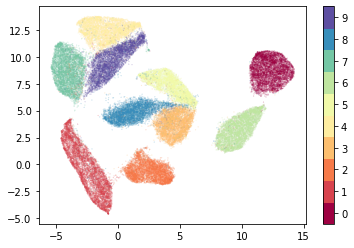

In [7]:
import umap

np.random.seed(100)
ump = umap.UMAP(n_neighbors=30,
        min_dist=min_dist,
        n_components=2,
        random_state=150,
        metric= 'euclidean')

y_umap_3 = ump.fit_transform(X_train)
ump.negative_sample_rate = 3
y_umap_test_3 = ump.transform(X_test)

plt.figure()
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train, s=0.01, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

<h1>UMAP ALL</h1>

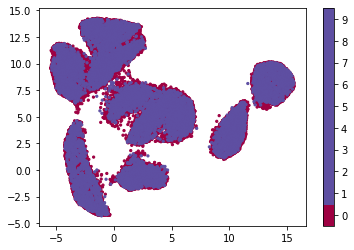

In [8]:
import umap

np.random.seed(100)
ump = umap.UMAP(n_neighbors=30,
        min_dist=min_dist,
        n_components=2,
        random_state=100,
        metric= 'euclidean')

t_umap_all = ump.fit_transform(X_all)

y_all = np.concatenate((np.zeros(X_train.shape[0]), np.ones(X_test.shape[0])))

t_umap_all_train_n = t_umap_all[:X_train.shape[0]]
t_umap_all_test_n = t_umap_all[X_train.shape[0]:]

plt.figure()
plt.scatter(t_umap_all[:,0], t_umap_all[:,1], c=y_all, s=5, cmap='Spectral')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)

In [9]:
t_umap_all_train = t_umap_all_train_n
t_umap_all_test = t_umap_all_test_n

<h1>P-UMAP-CE</h1>

In [10]:
import torch
from network_sig import network

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

X_train32 = X_train.astype(np.float32)

print('Conversion Done')
X_torch = torch.as_tensor(X_train32, dtype=torch.float32).to(device)
X_test_torch = torch.as_tensor(X_test, dtype=torch.float32).to(device)
print('Tensor Build Done')


Conversion Done
Tensor Build Done


In [11]:
model = network(channels=[X_train.shape[1],500,300,200,100,100,100,2]).to(device)
#network(channels=[X_train.shape[1],2000,3000,2000,1000,2]).to(device)
model.load_state_dict(torch.load('nets_dim_2/epoch39.pth'))
model.eval()

model.load_state_dict(torch.load('nets_dim_2/epoch39.pth'))
model.eval()

Y = []

with torch.no_grad():
    for i in range(n):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_torch[i:i+1,:]
        #print(x_st.size())
        y_st = model(x_st).cpu().numpy().reshape(-1)
        #print(y_st.shape)
        Y.append(y_st)

Y = np.array(Y)
#print(Y)

Y_test = []
n_test = X_test.shape[0]

with torch.no_grad():
    for i in range(n_test):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_test_torch[i:i+1,:]
        #print(x_st.size())
        y_st = model(x_st).cpu().numpy().reshape(-1)
        #print(y_st.shape)
        Y_test.append(y_st)

Y_test = np.array(Y_test)
#print(Y)

t_ce_n = Y
t_ce_test_n = Y_test
t_ce_tr_te_n = np.concatenate((Y,Y_test)).copy()


completed  0  of  60000
completed  10000  of  60000
completed  20000  of  60000
completed  30000  of  60000
completed  40000  of  60000
completed  50000  of  60000
completed  0  of  60000


In [12]:
t_ce = t_ce_n
t_ce_test = t_ce_test_n

<h1>Analyzin All</h1>

In [13]:
idxs_out_all = np.concatenate((idxs_outside, idxs_outside2, idxs_outside3))
idxs_in_all = np.concatenate((idxs_inside, idxs_inside2, idxs_inside3))

print(len(idxs_out_all), len(idxs_in_all))

29 29


Points Outside: 
Points inside
ns==5
AFR 2: 1.0613756 abs:  0.06137561798095703
RFR 2: 2.398173 abs:  1.3981730937957764
(29, 2)


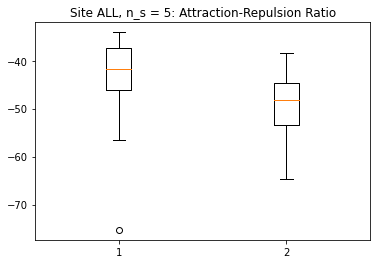

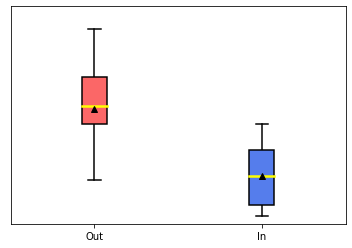

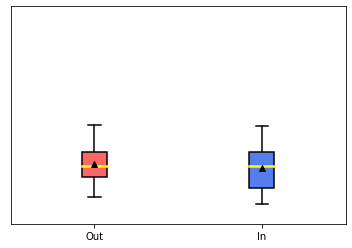

In [16]:
print('Points Outside: ')

idxs_out = idxs_out_all
idxs_in = idxs_in_all

ratios_outside = []
rf_outside = []
af_outside = []
for i in range(len(idxs_out)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                    y_umap_test[idxs_out[i],:], y_umap, 
                                    n_neighbors=30, min_dist=min_dist)
    
    ratios_outside.append(ratio)
    rf_outside.append(repulsion_forces)
    af_outside.append(attraction_force)

    
print('Points inside')
ratios_inside = []
rf_inside = []
af_inside = []
for i in range(len(idxs_in)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                    y_umap_test[idxs_in[i],:], y_umap, 
                                    n_neighbors=30, min_dist=min_dist)
    ratios_inside.append(ratio)
    rf_inside.append(repulsion_forces)
    af_inside.append(attraction_force)


rf_outside = np.array(rf_outside)
rf_inside = np.array(rf_inside)

af_outside = np.array(af_outside)
af_inside = np.array(af_inside)
    
ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T


rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)

afr_2 = np.sum(af_outside)/np.sum(af_inside)

print('ns==5')
print('AFR 2:', afr_2, 'abs: ', abs(1-afr_2))
print('RFR 2:', rfr_2, 'abs: ', abs(1-rfr_2))

tick_labels = ['Out', 'In']
colors = ['#fb6767', '#557dec']

print(ratios.shape)

plt.figure()
plt.boxplot(ratios)
#plt.ylim([-230,-50])
plt.title('Site ALL, n_s = 5: Attraction-Repulsion Ratio')

plt.figure()
bp2 = plt.boxplot(rf_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 35])
plt.yticks([])
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_rf_UMAP_ns5.png', dpi=DPI, bbox_inches='tight')

plt.figure()
bp2 = plt.boxplot(af_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 3])
plt.yticks([])
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_af_UMAP_ns5.png', dpi=DPI, bbox_inches='tight')

Points Outside: 
Points inside
ns=3
AFR 2: 1.0422518 abs:  0.0422518253326416
RFR 2: 1.498836 abs:  0.49883604049682617
(29, 2)


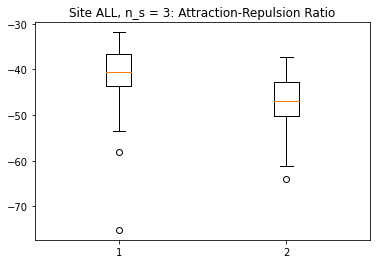

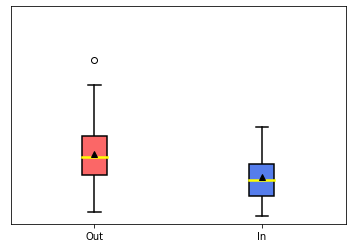

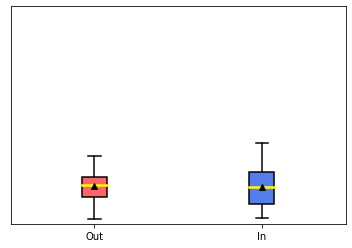

In [17]:
print('Points Outside: ')

idxs_out = idxs_out_all
idxs_in = idxs_in_all

ratios_outside = []
rf_outside = []
af_outside = []
for i in range(len(idxs_out)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                    y_umap_test_3[idxs_out[i],:], y_umap_3, 
                                    n_neighbors=30, min_dist=min_dist)
    
    ratios_outside.append(ratio)
    rf_outside.append(repulsion_forces)
    af_outside.append(attraction_force)

    
print('Points inside')
ratios_inside = []
rf_inside = []
af_inside = []
for i in range(len(idxs_in)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                    y_umap_test_3[idxs_in[i],:], y_umap_3, 
                                    n_neighbors=30, min_dist=min_dist)
    ratios_inside.append(ratio)
    rf_inside.append(repulsion_forces)
    af_inside.append(attraction_force)

ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T

rf_outside = np.array(rf_outside)
rf_inside = np.array(rf_inside)

af_outside = np.array(af_outside)
af_inside = np.array(af_inside)
    
ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T


rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)

afr_2 = np.sum(af_outside)/np.sum(af_inside)

print('ns=3')
print('AFR 2:', afr_2, 'abs: ', abs(1-afr_2))
print('RFR 2:', rfr_2, 'abs: ', abs(1-rfr_2))

print(ratios.shape)

plt.figure()
plt.boxplot(ratios)
plt.title('Site ALL, n_s = 3: Attraction-Repulsion Ratio')

plt.figure()
bp2 = plt.boxplot(rf_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 35])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Repulsion Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_rf_UMAP_ns3.png', dpi=DPI, bbox_inches='tight')

plt.figure()
bp2 = plt.boxplot(af_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 3])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Attraction Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_af_UMAP_ns3.png', dpi=DPI, bbox_inches='tight')

Points Outside: 
Points inside
ns=1
AFR 2: 0.8883801 abs:  0.11161988973617554
RFR 2: 1.1250291 abs:  0.1250290870666504
(29, 2)


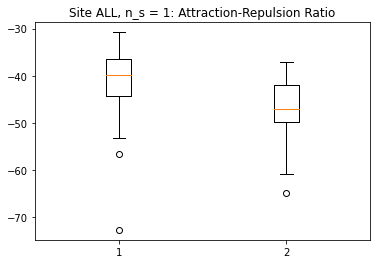

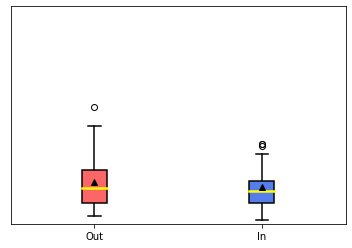

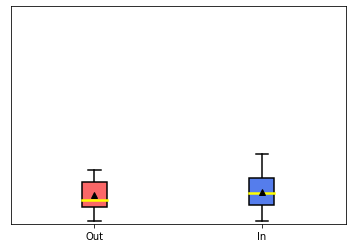

In [18]:
import umap

np.random.seed(100)
ump = umap.UMAP(n_neighbors=30,
        min_dist=min_dist,
        n_components=2,
        random_state=150,
        metric= 'euclidean')

y_umap_1 = ump.fit_transform(X_train)
ump.negative_sample_rate = 1
y_umap_test_1 = ump.transform(X_test)

print('Points Outside: ')

idxs_out = idxs_out_all
idxs_in = idxs_in_all

ratios_outside = []
rf_outside = []
af_outside = []
for i in range(len(idxs_out)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                    y_umap_test_1[idxs_out[i],:], y_umap_1, 
                                    n_neighbors=30, min_dist=min_dist)
    
    ratios_outside.append(ratio)
    rf_outside.append(repulsion_forces)
    af_outside.append(attraction_force)

    
print('Points inside')
ratios_inside = []
rf_inside = []
af_inside = []
for i in range(len(idxs_in)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                    y_umap_test_1[idxs_in[i],:], y_umap_1, 
                                    n_neighbors=30, min_dist=min_dist)
    ratios_inside.append(ratio)
    rf_inside.append(repulsion_forces)
    af_inside.append(attraction_force)

ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T

rf_outside = np.array(rf_outside)
rf_inside = np.array(rf_inside)

af_outside = np.array(af_outside)
af_inside = np.array(af_inside)

ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T


rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)

afr_2 = np.sum(af_outside)/np.sum(af_inside)

print('ns=1')
print('AFR 2:', afr_2, 'abs: ', abs(1-afr_2))
print('RFR 2:', rfr_2, 'abs: ', abs(1-rfr_2))

print(ratios.shape)


plt.figure()
plt.boxplot(ratios)
plt.title('Site ALL, n_s = 1: Attraction-Repulsion Ratio')

plt.figure()
bp2 = plt.boxplot(rf_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 35])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Repulsion Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_rf_UMAP_ns1.png', dpi=DPI, bbox_inches='tight')

plt.figure()
bp2 = plt.boxplot(af_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 3])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Attraction Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_af_UMAP_ns1.png', dpi=DPI, bbox_inches='tight')

Points Outside: 
Points inside
UMAP_ALL
AFR 2: 1.1309067 abs:  0.13090670108795166
RFR 2: 1.4041479 abs:  0.4041478633880615
(29, 2)


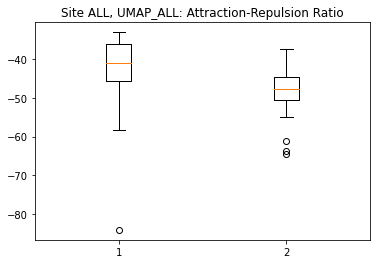

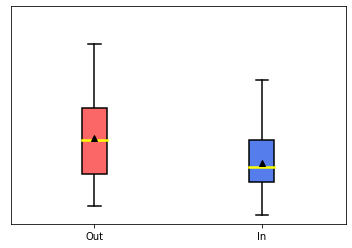

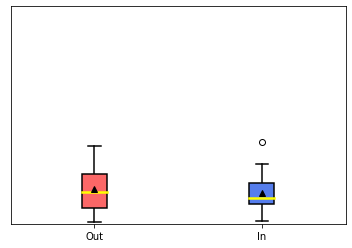

In [19]:
print('Points Outside: ')

idxs_out = idxs_out_all
idxs_in = idxs_in_all

ratios_outside = []
rf_outside = []
af_outside = []
for i in range(len(idxs_out)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                    t_umap_all_test[idxs_out[i],:], t_umap_all_train, 
                                    n_neighbors=30, min_dist=min_dist)
    
    ratios_outside.append(ratio)
    rf_outside.append(repulsion_forces)
    af_outside.append(attraction_force)

    
print('Points inside')
ratios_inside = []
rf_inside = []
af_inside = []
for i in range(len(idxs_in)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                    t_umap_all_test[idxs_in[i],:], t_umap_all_train, 
                                    n_neighbors=30, min_dist=min_dist)
    ratios_inside.append(ratio)
    rf_inside.append(repulsion_forces)
    af_inside.append(attraction_force)

ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T

rf_outside = np.array(rf_outside)
rf_inside = np.array(rf_inside)

af_outside = np.array(af_outside)
af_inside = np.array(af_inside)
    
ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T


rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)

afr_2 = np.sum(af_outside)/np.sum(af_inside)

print('UMAP_ALL')
print('AFR 2:', afr_2, 'abs: ', abs(1-afr_2))
print('RFR 2:', rfr_2, 'abs: ', abs(1-rfr_2))

print(ratios.shape)

plt.figure()
plt.boxplot(ratios)
plt.title('Site ALL, UMAP_ALL: Attraction-Repulsion Ratio')

plt.figure()
bp2 = plt.boxplot(rf_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 35])
plt.yticks([])
#plt.yticks(fontsize=14)
#plt.title('Site ALL, n_s = 3: Repulsion Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_rf_UMAP_all.png', dpi=DPI, bbox_inches='tight')

plt.figure()
bp2 = plt.boxplot(af_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 3])
plt.yticks([])
#plt.yticks(fontsize=14)
#plt.title('Site ALL, n_s = 3: Attraction Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_af_UMAP_all.png', dpi=DPI, bbox_inches='tight')

Points Outside: 
Points inside
UMAP_CE
AFR 2: 0.7596082 abs:  0.2403917908668518
RFR 2: 1.1261494 abs:  0.12614941596984863
(29, 2)


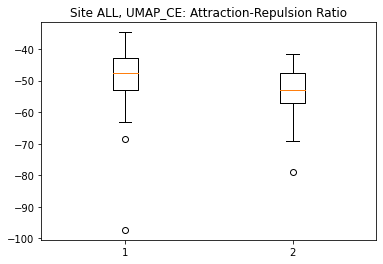

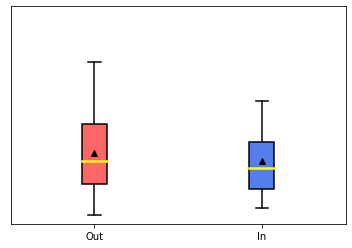

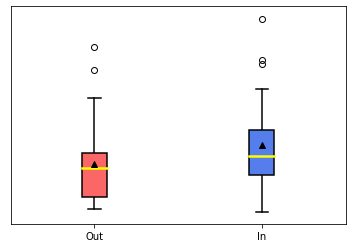

In [20]:
print('Points Outside: ')

idxs_out = idxs_out_all
idxs_in = idxs_in_all

ratios_outside = []
rf_outside = []
af_outside = []
for i in range(len(idxs_out)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                    t_ce_test[idxs_out[i],:], t_ce, 
                                    n_neighbors=30, min_dist=min_dist)
    
    ratios_outside.append(ratio)
    rf_outside.append(repulsion_forces)
    af_outside.append(attraction_force)

    
print('Points inside')
ratios_inside = []
rf_inside = []
af_inside = []
for i in range(len(idxs_in)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                    t_ce_test[idxs_in[i],:], t_ce, 
                                    n_neighbors=30, min_dist=min_dist)
    ratios_inside.append(ratio)
    rf_inside.append(repulsion_forces)
    af_inside.append(attraction_force)

ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T


rf_outside = np.array(rf_outside)
rf_inside = np.array(rf_inside)

af_outside = np.array(af_outside)
af_inside = np.array(af_inside)
    
ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T

rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)

afr_2 = np.sum(af_outside)/np.sum(af_inside)

print('UMAP_CE')
print('AFR 2:', afr_2, 'abs: ', abs(1-afr_2))
print('RFR 2:', rfr_2, 'abs: ', abs(1-rfr_2))
print(ratios.shape)


plt.figure()
plt.boxplot(ratios)
plt.title('Site ALL, UMAP_CE: Attraction-Repulsion Ratio')

plt.figure()
bp2 = plt.boxplot(rf_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 35])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Repulsion Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_rf_UMAP_CE.png', dpi=DPI, bbox_inches='tight')

plt.figure()
bp2 = plt.boxplot(af_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 3])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Attraction Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_af_UMAP_CE.png', dpi=DPI, bbox_inches='tight')

completed  0  of  60000
completed  10000  of  60000
completed  20000  of  60000
completed  30000  of  60000
completed  40000  of  60000
completed  50000  of  60000
completed  0  of  60000
Points Outside: 
Points inside
UMAP_CE_MSE
AFR 2: 0.6826338 abs:  0.31736618280410767
RFR 2: 1.244256 abs:  0.24425601959228516
(29, 2)


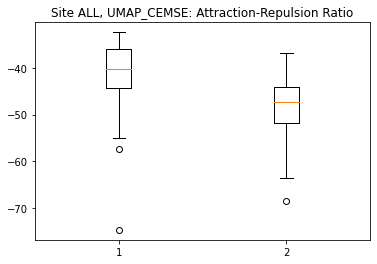

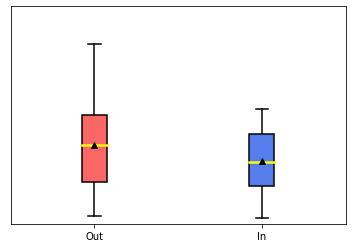

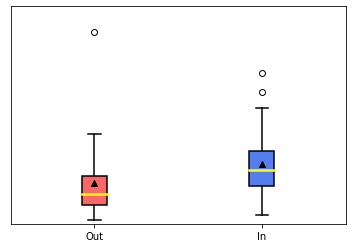

In [21]:
model3 = network(channels=[X_train.shape[1],500,300,200,100,100,100,2]).to(device)

model3.load_state_dict(torch.load('nets_MSE_CE_UMAP_dim_2/epoch19.pth'))
model3.eval()

Y_MSECE = []

with torch.no_grad():
    for i in range(n):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_torch[i:i+1,:]
        #print(x_st.size())
        y_st = model3(x_st).cpu().numpy().reshape(-1)
        #print(y_st.shape)
        Y_MSECE.append(y_st)

Y_MSECE = np.array(Y_MSECE)

Y_test_MSECE = []
n_test = X_test.shape[0]

with torch.no_grad():
    for i in range(n_test):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_test_torch[i:i+1,:]
        #print(x_st.size())
        y_st = model3(x_st).cpu().numpy().reshape(-1)
        #print(y_st.shape)
        Y_test_MSECE.append(y_st)

Y_test_MSECE = np.array(Y_test_MSECE)

t_cemse_n = Y_MSECE
t_cemse_test_n = Y_test_MSECE
t_cemse_tr_te_n = np.concatenate((Y_MSECE, Y_test_MSECE)).copy()


print('Points Outside: ')

idxs_out = idxs_out_all
idxs_in = idxs_in_all

ratios_outside = []
rf_outside = []
af_outside = []
for i in range(len(idxs_out)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                    t_cemse_test_n[idxs_out[i],:], t_cemse_n, 
                                    n_neighbors=30, min_dist=min_dist)
    
    ratios_outside.append(ratio)
    rf_outside.append(repulsion_forces)
    af_outside.append(attraction_force)

    
print('Points inside')
ratios_inside = []
rf_inside = []
af_inside = []
for i in range(len(idxs_in)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                    t_cemse_test_n[idxs_in[i],:], t_cemse_n, 
                                    n_neighbors=30, min_dist=min_dist)
    ratios_inside.append(ratio)
    rf_inside.append(repulsion_forces)
    af_inside.append(attraction_force)

ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T


rf_outside = np.array(rf_outside)
rf_inside = np.array(rf_inside)

af_outside = np.array(af_outside)
af_inside = np.array(af_inside)
    
ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T

rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)

afr_2 = np.sum(af_outside)/np.sum(af_inside)

print('UMAP_CE_MSE')
print('AFR 2:', afr_2, 'abs: ', abs(1-afr_2))
print('RFR 2:', rfr_2, 'abs: ', abs(1-rfr_2))

print(ratios.shape)



plt.figure()
plt.boxplot(ratios)
plt.title('Site ALL, UMAP_CEMSE: Attraction-Repulsion Ratio')

plt.figure()
bp2 = plt.boxplot(rf_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 35])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Repulsion Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_rf_UMAP_CEMSE.png', dpi=DPI, bbox_inches='tight')

plt.figure()
bp2 = plt.boxplot(af_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 3])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Attraction Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_af_UMAP_CEMSE.png', dpi=DPI, bbox_inches='tight')

completed  0  of  60000
completed  10000  of  60000
completed  20000  of  60000
completed  30000  of  60000
completed  40000  of  60000
completed  50000  of  60000
completed  0  of  10000
Points Outside: 
Points inside
UMAP_MSE
AFR 2: 0.830315 abs:  0.1696850061416626
RFR 2: 1.2668912 abs:  0.2668912410736084
(29, 2)


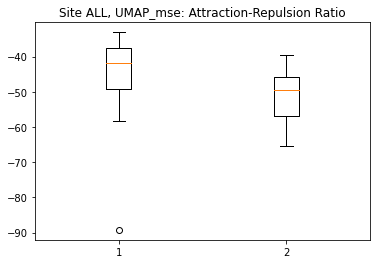

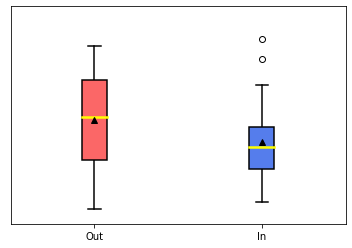

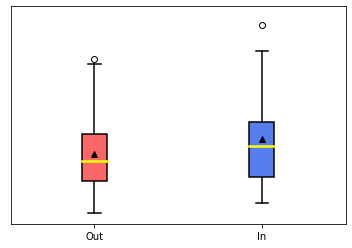

In [22]:
model2 = network(channels=[X_train.shape[1],500,300,200,100,100,100,2]).to(device)
model2.load_state_dict(torch.load('nets_MSE_UMAP_dim_2/epoch0.pth'))
model2.eval()

model2.load_state_dict(torch.load('nets_MSE_UMAP_dim_2/epoch20.pth'))
model2.eval()

Y_MSE = []

with torch.no_grad():
    for i in range(n):
        if i%10000 == 0:
            print('completed ', i, ' of ', n)
            
        x_st = X_torch[i:i+1,:]
        #print(x_st.size())
        y_st = model2(x_st).cpu().numpy().reshape(-1)
        #print(y_st.shape)
        Y_MSE.append(y_st)

Y_MSE = np.array(Y_MSE)

Y_test_MSE = []
n_test = X_test.shape[0]

with torch.no_grad():
    for i in range(n_test):
        if i%10000 == 0:
            print('completed ', i, ' of ', n_test)
            
        x_st = X_test_torch[i:i+1,:]
        #print(x_st.size())
        y_st = model2(x_st).cpu().numpy().reshape(-1)
        #print(y_st.shape)
        Y_test_MSE.append(y_st)

Y_test_MSE = np.array(Y_test_MSE)


t_mse_n = Y_MSE
t_mse_test_n = Y_test_MSE
t_mse_tr_te_n = np.concatenate((Y_MSE, Y_test_MSE)).copy()


print('Points Outside: ')

idxs_out = idxs_out_all
idxs_in = idxs_in_all

ratios_outside = []
rf_outside = []
af_outside = []
for i in range(len(idxs_out)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                    t_mse_test_n[idxs_out[i],:], t_mse_n, 
                                    n_neighbors=30, min_dist=min_dist)
    
    ratios_outside.append(ratio)
    rf_outside.append(repulsion_forces)
    af_outside.append(attraction_force)

    
print('Points inside')
ratios_inside = []
rf_inside = []
af_inside = []
for i in range(len(idxs_in)):
    ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                    t_mse_test_n[idxs_in[i],:], t_mse_n, 
                                    n_neighbors=30, min_dist=min_dist)
    ratios_inside.append(ratio)
    rf_inside.append(repulsion_forces)
    af_inside.append(attraction_force)

ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T


rf_outside = np.array(rf_outside)
rf_inside = np.array(rf_inside)

af_outside = np.array(af_outside)
af_inside = np.array(af_inside)
    
ratios = np.array([ratios_outside, ratios_inside]).T
rf_all = np.array([rf_outside, rf_inside]).T
af_all = np.array([af_outside, af_inside]).T

rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)

afr_2 = np.sum(af_outside)/np.sum(af_inside)

print('UMAP_MSE')
print('AFR 2:', afr_2, 'abs: ', abs(1-afr_2))
print('RFR 2:', rfr_2, 'abs: ', abs(1-rfr_2))

print(ratios.shape)



plt.figure()
plt.boxplot(ratios)
plt.title('Site ALL, UMAP_mse: Attraction-Repulsion Ratio')

plt.figure()
bp2 = plt.boxplot(rf_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 35])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Repulsion Forces')
plt.xticks([1, 2], ['Out', 'In'])
plt.savefig('mnist_boxplot/bx_mnist_rf_UMAP_MSE.png', dpi=DPI, bbox_inches='tight')

plt.figure()
bp2 = plt.boxplot(af_all,
                  vert=True,  
                  patch_artist=True, 
                  labels=tick_labels,
                  showmeans = True,
                  meanprops = dict(markeredgecolor='k',markerfacecolor='k'),
                  whiskerprops = dict(linewidth=1.5),
                  capprops = dict(linewidth=1.5),
                  boxprops = dict(linewidth=1.5),
                  medianprops=dict(color='yellow', linewidth=2.5))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
plt.ylim([0, 3])
plt.yticks([])
#plt.title('Site ALL, n_s = 3: Attraction Forces')
plt.xticks([1, 2], ['Out', 'In'])
#plt.xticks([1, 2], [r'S_1', r'S_2'])
plt.savefig('mnist_boxplot/bx_mnist_af_UMAP_MSE.png', dpi=DPI, bbox_inches='tight')

<h1>Ablation Study</h1>

29 29
Starting index  0
Starting index  1
Starting index  2
Starting index  3
Starting index  4
Starting index  5
Starting index  6


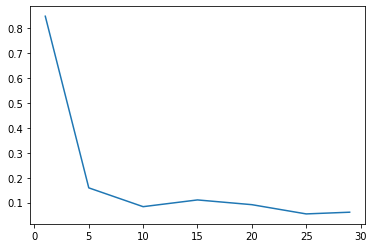

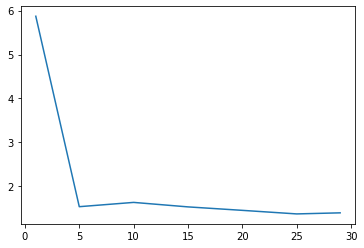

In [23]:
#idxs_out_all
#idxs_in_all
print(len(idxs_out_all), len(idxs_in_all))

seed = 9089
np.random.seed(seed)

Ns =       [1, 5, 10,15,20,25,29]
N_samples = [10,10,10,10,10,10,1]
AFR_N_s = []
RFR_N_s = []

for i in range(len(Ns)):
    print('Starting index ', i)
    N_s = Ns[i]
    N_sample = N_samples[i]
    
    afrs = []
    rfrs = []
    
    
    for j in range(N_sample):
        idxs_out = np.random.choice(idxs_out_all,N_s,replace=False)
        idxs_in = np.random.choice(idxs_in_all,N_s,replace=False) #idxs_in_all

        ratios_outside = []
        rf_outside = []
        af_outside = []
        for i in range(len(idxs_out)):
            ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                            y_umap_test[idxs_out[i],:], y_umap, 
                                            n_neighbors=30, min_dist=min_dist)

            ratios_outside.append(ratio)
            rf_outside.append(repulsion_forces)
            af_outside.append(attraction_force)


        #print('Points inside')
        ratios_inside = []
        rf_inside = []
        af_inside = []
        for i in range(len(idxs_in)):
            ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                            y_umap_test[idxs_in[i],:], y_umap, 
                                            n_neighbors=30, min_dist=min_dist)
            ratios_inside.append(ratio)
            rf_inside.append(repulsion_forces)
            af_inside.append(attraction_force)


        rf_outside = np.array(rf_outside)
        rf_inside = np.array(rf_inside)

        af_outside = np.array(af_outside)
        af_inside = np.array(af_inside)

        ratios = np.array([ratios_outside, ratios_inside]).T
        rf_all = np.array([rf_outside, rf_inside]).T
        af_all = np.array([af_outside, af_inside]).T


        rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)
        rfrs.append(rfr_2)

        afr_2 = np.sum(af_outside)/np.sum(af_inside)
        afrs.append(afr_2)
    if len(afrs)==1:
        afrs = afrs*10
        rfrs = rfrs*10
    
    AFR_N_s.append(afrs)
    RFR_N_s.append(rfrs)

AFR_N_s_UMAP = np.array(AFR_N_s)
RFR_N_s_UMAP = np.array(RFR_N_s)

AFR_2UMAP = np.abs(1-AFR_N_s_UMAP)
RFR_2UMAP = np.abs(1-RFR_N_s_UMAP)

AFR_2_mUMAP = np.mean(AFR_2UMAP,axis=1)
RFR_2_mUMAP = np.mean(RFR_2UMAP,axis=1)

AFR_2_stdUMAP = np.std(AFR_2UMAP,axis=1)
RFR_2_stdUMAP = np.std(RFR_2UMAP,axis=1)

plt.figure()
plt.plot(Ns, AFR_2_mUMAP)

plt.figure()
plt.plot(Ns, RFR_2_mUMAP)


29 29
Starting index  0
Starting index  1
Starting index  2
Starting index  3
Starting index  4
Starting index  5
Starting index  6


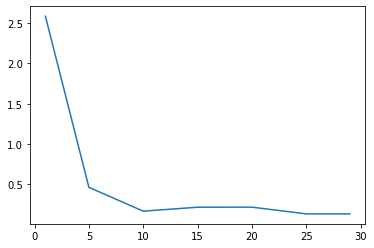

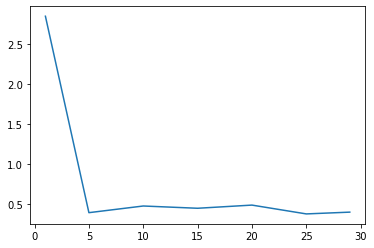

In [26]:
#idxs_out_all
#idxs_in_all
print(len(idxs_out_all), len(idxs_in_all))

seed = 9089
np.random.seed(seed)

Ns =       [1, 5, 10,15,20,25,29]
N_samples = [10,10,10,10,10,10,1]
AFR_N_s = []
RFR_N_s = []

for i in range(len(Ns)):
    print('Starting index ', i)
    N_s = Ns[i]
    N_sample = N_samples[i]
    
    afrs = []
    rfrs = []
    
    
    for j in range(N_sample):
        idxs_out = np.random.choice(idxs_out_all,N_s,replace=False)
        idxs_in = np.random.choice(idxs_in_all,N_s,replace=False) #idxs_in_all

        ratios_outside = []
        rf_outside = []
        af_outside = []
        for i in range(len(idxs_out)):
            ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                            t_umap_all_test[idxs_out[i],:], t_umap_all_train,
                                            n_neighbors=30, min_dist=min_dist)

            ratios_outside.append(ratio)
            rf_outside.append(repulsion_forces)
            af_outside.append(attraction_force)


        #print('Points inside')
        ratios_inside = []
        rf_inside = []
        af_inside = []
        for i in range(len(idxs_in)):
            ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train,
                                            t_umap_all_test[idxs_in[i],:], t_umap_all_train,
                                            n_neighbors=30, min_dist=min_dist)
            ratios_inside.append(ratio)
            rf_inside.append(repulsion_forces)
            af_inside.append(attraction_force)


        rf_outside = np.array(rf_outside)
        rf_inside = np.array(rf_inside)

        af_outside = np.array(af_outside)
        af_inside = np.array(af_inside)

        ratios = np.array([ratios_outside, ratios_inside]).T
        rf_all = np.array([rf_outside, rf_inside]).T
        af_all = np.array([af_outside, af_inside]).T


        rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)
        rfrs.append(rfr_2)

        afr_2 = np.sum(af_outside)/np.sum(af_inside)
        afrs.append(afr_2)
    if len(afrs)==1:
        afrs = afrs*10
        rfrs = rfrs*10
    
    AFR_N_s.append(afrs)
    RFR_N_s.append(rfrs)

AFR_N_s_ALL = np.array(AFR_N_s)
RFR_N_s_ALL = np.array(RFR_N_s)

AFR_2ALL = np.abs(1-AFR_N_s_ALL)
RFR_2ALL = np.abs(1-RFR_N_s_ALL)

AFR_2_mALL = np.mean(AFR_2ALL,axis=1)
RFR_2_mALL = np.mean(RFR_2ALL,axis=1)

AFR_2_stdALL = np.std(AFR_2ALL,axis=1)
RFR_2_stdALL = np.std(RFR_2ALL,axis=1)

plt.figure()
plt.plot(Ns, AFR_2_mALL)

plt.figure()
plt.plot(Ns, RFR_2_mALL)


29 29
Starting index  0
Starting index  1
Starting index  2
Starting index  3
Starting index  4
Starting index  5
Starting index  6


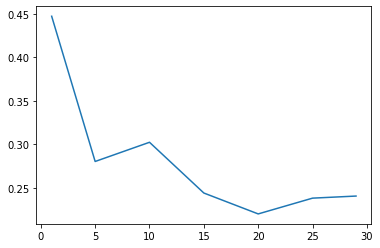

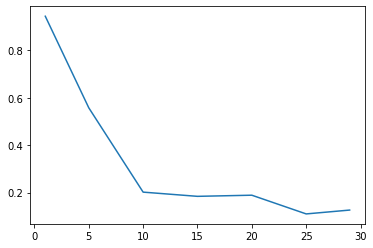

In [24]:
#idxs_out_all
#idxs_in_all
print(len(idxs_out_all), len(idxs_in_all))

seed = 9089
np.random.seed(seed)

Ns =       [1, 5, 10,15,20,25,29]
N_samples = [10,10,10,10,10,10,1]
AFR_N_s = []
RFR_N_s = []

for i in range(len(Ns)):
    print('Starting index ', i)
    N_s = Ns[i]
    N_sample = N_samples[i]
    
    afrs = []
    rfrs = []
    
    
    for j in range(N_sample):
        idxs_out = np.random.choice(idxs_out_all,N_s,replace=False)
        idxs_in = np.random.choice(idxs_in_all,N_s,replace=False) #idxs_in_all

        ratios_outside = []
        rf_outside = []
        af_outside = []
        for i in range(len(idxs_out)):
            ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_out[i],:], X_train, 
                                            t_ce_test[idxs_out[i],:], t_ce,
                                            n_neighbors=30, min_dist=min_dist)

            ratios_outside.append(ratio)
            rf_outside.append(repulsion_forces)
            af_outside.append(attraction_force)


        #print('Points inside')
        ratios_inside = []
        rf_inside = []
        af_inside = []
        for i in range(len(idxs_in)):
            ratio, repulsion_forces, attraction_force = nearest_neighbors_search(X_test[idxs_in[i],:], X_train, 
                                            t_ce_test[idxs_in[i],:], t_ce,
                                            n_neighbors=30, min_dist=min_dist)
            ratios_inside.append(ratio)
            rf_inside.append(repulsion_forces)
            af_inside.append(attraction_force)


        rf_outside = np.array(rf_outside)
        rf_inside = np.array(rf_inside)

        af_outside = np.array(af_outside)
        af_inside = np.array(af_inside)

        ratios = np.array([ratios_outside, ratios_inside]).T
        rf_all = np.array([rf_outside, rf_inside]).T
        af_all = np.array([af_outside, af_inside]).T


        rfr_2 = np.sum(rf_outside)/np.sum(rf_inside)
        rfrs.append(rfr_2)

        afr_2 = np.sum(af_outside)/np.sum(af_inside)
        afrs.append(afr_2)
    if len(afrs)==1:
        afrs = afrs*10
        rfrs = rfrs*10
    
    AFR_N_s.append(afrs)
    RFR_N_s.append(rfrs)

AFR_N_s_CE = np.array(AFR_N_s)
RFR_N_s_CE = np.array(RFR_N_s)

AFR_2CE = np.abs(1-AFR_N_s_CE)
RFR_2CE = np.abs(1-RFR_N_s_CE)

AFR_2_mCE = np.mean(AFR_2CE,axis=1)
RFR_2_mCE = np.mean(RFR_2CE,axis=1)

AFR_2_stdCE = np.std(AFR_2CE,axis=1)
RFR_2_stdCE = np.std(RFR_2CE,axis=1)

plt.figure()
plt.plot(Ns, AFR_2_mCE)

plt.figure()
plt.plot(Ns, RFR_2_mCE)


[0.848028   0.15910147 0.08357377 0.11065938 0.09163605 0.05449969
 0.06137562]
[0.44736162 0.2801975  0.30229232 0.2438868  0.21983925 0.23799548
 0.24039169]


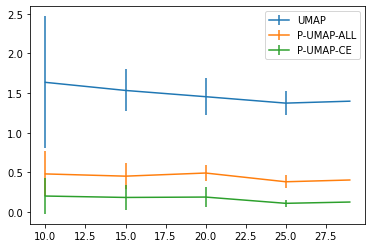

In [30]:
print(AFR_2_mUMAP)
print(AFR_2_mCE)
plt.figure()
idx_start = 2
plt.errorbar(Ns[idx_start:], RFR_2_mUMAP[idx_start:], yerr=RFR_2_stdUMAP[idx_start:], label='UMAP')
plt.errorbar(Ns[idx_start:], RFR_2_mALL[idx_start:],   yerr=RFR_2_stdALL[idx_start:],   label='P-UMAP-ALL')
plt.errorbar(Ns[idx_start:], RFR_2_mCE[idx_start:],   yerr=RFR_2_stdCE[idx_start:],   label='P-UMAP-CE')
plt.legend()
